In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with=engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement

station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

Text(0, 0.5, 'inches')

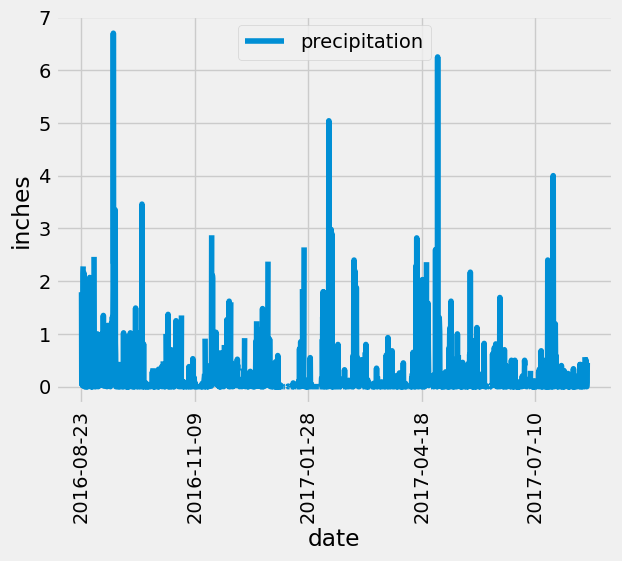

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_data_df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
prcp_data_df = prcp_data_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
prcp_data_df.plot(x='date', y='precipitation', rot=90)
plt.xlabel("date")
plt.ylabel("inches")

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_data_df['precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(measurement.station).distinct().count()
total_stations

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

stations_list = [measurement.station,
                 func.count(measurement.station)]

ordered_stations_list = []

for station in session.query(*stations_list).\
    group_by(measurement.station).\
    order_by(stations_list[1].desc()).\
    all():
    ordered_stations_list.append(station)
    
ordered_stations_list


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(measurement.tobs),
        func.max(measurement.tobs),
        func.avg(measurement.tobs)]

most_active = session.query(*sel).\
                filter(measurement.station == 'USC00519281').all()
                
print(most_active)

[(54.0, 85.0, 71.66378066378067)]


Text(0, 0.5, 'frequency')

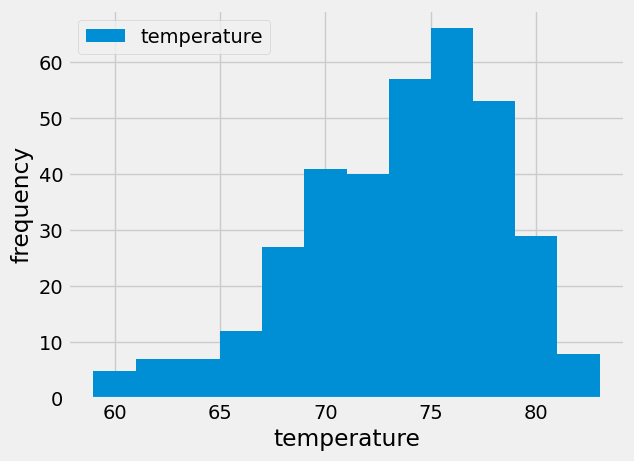

In [41]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= prev_year).\
    filter(measurement.station == 'USC00519281').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
tobs_data_df = pd.DataFrame(results, columns=['date', 'temperature'])

# Sort the dataframe by date
tobs_data_df = tobs_data_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
tobs_data_df.plot.hist(bins=12)
plt.xlabel("temperature")
plt.ylabel("frequency")

# Close Session

In [42]:
# Close Session
session.close()